# Exploring the (possible) bad bias

In [1]:
%matplotlib notebook

In [2]:
# imports
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits

from pypeit import ginga

## Load up the short exposure where the gap is evident in the processed data

In [67]:
hdu = fits.open('desi-00016330.fits.fz')
hdu_289 = fits.open('desi-00016289.fits.fz')
hdu_260 = fits.open('desi-00016260.fits.fz') # bias
hdu.info()

Filename: desi-00016330.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SPS           1 CompImageHDU    173   (10,)   int16   
  2  Z2            1 CompImageHDU    136   (4256, 4194)   int16   
  3  R2            1 CompImageHDU    136   (4256, 4194)   int16   
  4  B2            1 CompImageHDU    136   (4232, 4162)   int16   
  5  SPECTCONS     1 BinTableHDU    109   1R x 37C   [K, 1PA(26), 1PA(15), D, 1PA(12), 1PA(19), 1PA(5), 1PA(4), 1PA(3), 1PA(4), 1PA(3), 1PA(5), 1PA(4), 1PA(8), 1PA(2), 1PA(6), 1PA(8), 1PA(2), 1PA(8), D, D, D, D, D, D, 1PA(3), 1PA(3), 1PA(3), 1PA(3), 1PA(3), 1PA(3), 1PA(7), 1PA(7), 1PA(7), 1PA(3), 1PA(3), 1PA(3)]   


## z2

In [68]:
z2 = hdu[2].data
z2_289 = hdu_289[2].data
z2_260 = hdu_260[2].data

In [69]:
ginga.show_image(z2_260)

(<ginga.util.grc.RemoteClient at 0x7f30072c0898>,
 <ginga.util.grc._channel_proxy at 0x7f30072c0ac8>)

### Gain

In [19]:
gainA, gainB, gainC, gainD = 1.22, 1.27, 1.37, 1.29  # JXP
#gainA, gainB, gainC, gainD = 1.23975, 1.2825, 1.39365, 1.29996  # Old

## Look at a pair of Amps

### Image cuts

In [49]:
def image_cuts(z2):
    cutA = np.median(z2[2035:2060, 110:1930], axis=0)
    biasA_rows = np.median(z2[2067:2092, 110:1930], axis=0)
    biasA_cols = np.median(z2[2025:2060, 2065:2090])

    cutC = np.median(z2[2130:2155, 110:1930], axis=0)
    biasC_rows = np.median(z2[2100:2125, 110:1930], axis=0)
    biasC_cols = np.median(z2[2130:2155, 2065:2090])
    print(biasA_cols, biasC_cols)
    #
    return cutA, biasA_rows, biasA_cols, cutC, biasC_rows, biasC_cols

#cutA.shape, biasA_rows.shape, np.median(biasA_rows), biasA_cols

In [50]:
cutA, biasA_rows, biasA_cols, cutC, biasC_rows, biasC_cols = image_cuts(z2)

2007.0 2009.0


In [51]:
cutA, biasA_rows, biasA_cols, cutC, biasA_rows, biasA_cols = image_cuts(z2_289)

2007.0 2009.0


### Plot rows

<IPython.core.display.Javascript object>


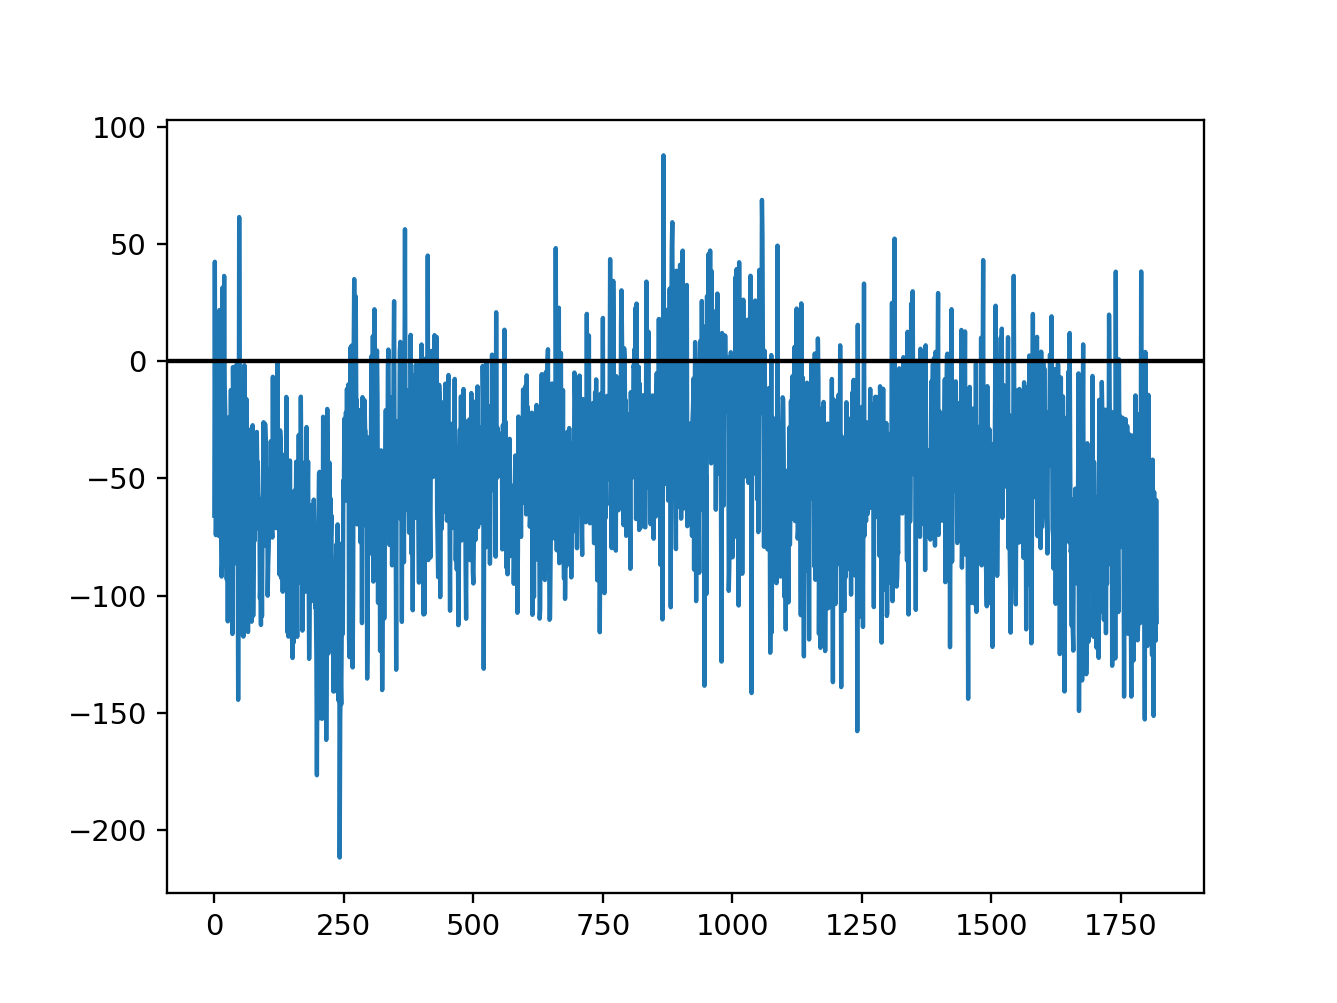

In [59]:
plt.clf()
ax = plt.gca()
ax.plot((cutA-biasA_rows)*gainA-(cutC-biasC_rows)*gainC)
ax.axhline(color='k')
#ax.set_ylim(-40., 40)
plt.show()

### Plot cols

<IPython.core.display.Javascript object>


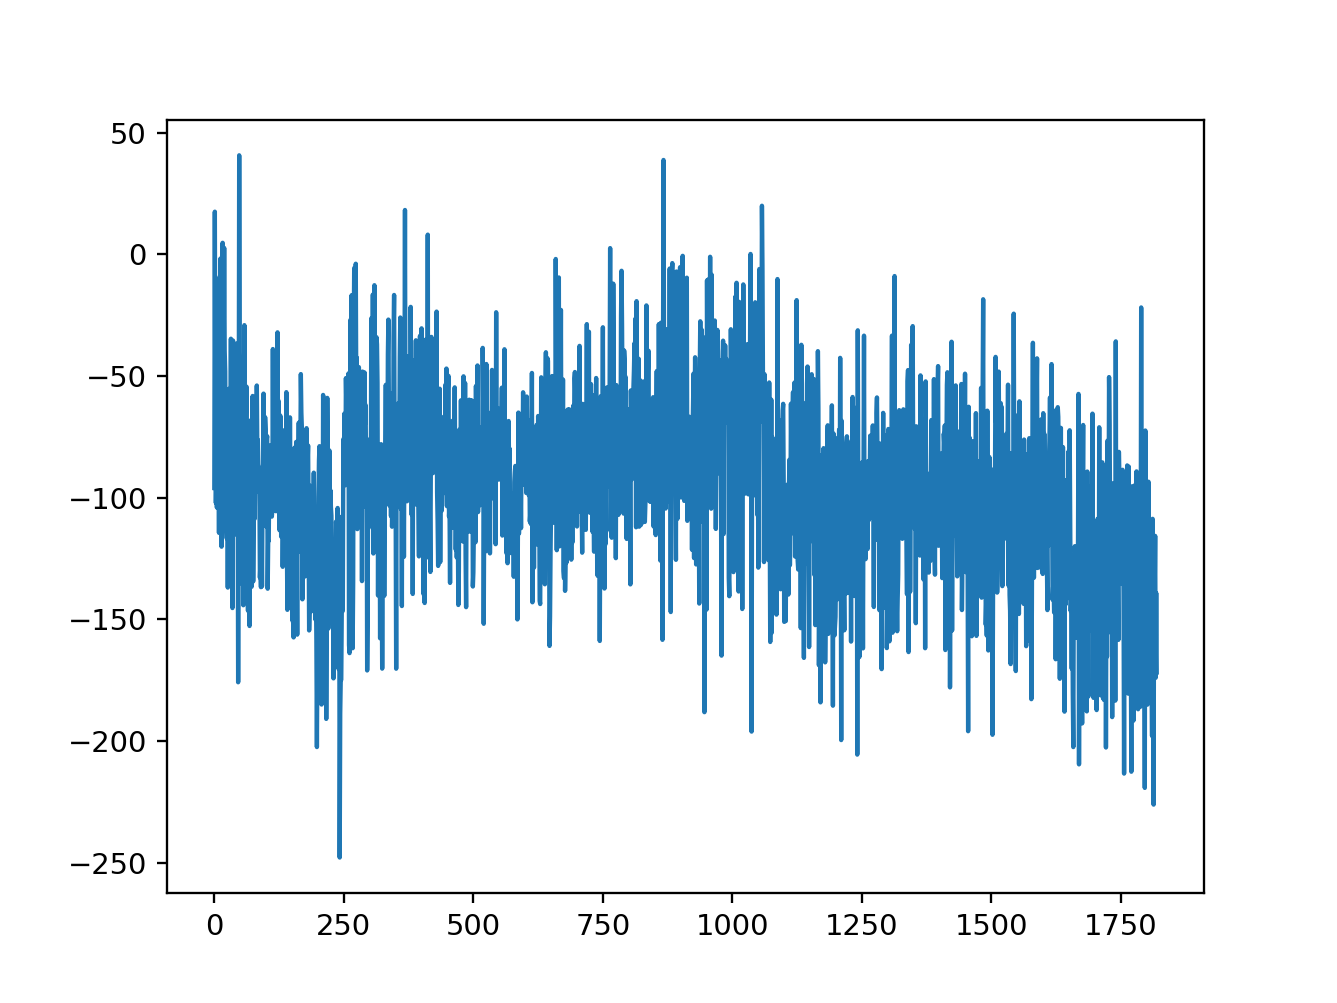

In [60]:
plt.clf()
ax = plt.gca()
ax.plot((cutA-biasA_cols)*gainA-(cutC-biasC_cols)*gainC)
#ax.axhline(color='k')
#ax.set_ylim(-40., 40)
plt.show()

## Explore preproc

    desi_preproc --cameras z2 -i /exposures/desi/20190619/00016330/desi-00016330.fits.fz -o preproc-z2-000163330.fits
    WARNING:preproc.py:127:main: --outdir not specified; using /n/home/datasystems/users/xavier/Flat_jump
    INFO:raw.py:59:read_raw: will add header keywords from hdus [0]
    INFO:calibfinder.py:202:__init__: Found data version V3 for camera z2 in /software/datasystems/desi_spectro_calib/trunk/spec/sp2/z2.yaml
    INFO:preproc.py:252:get_calibration_image: Using BIAS /software/datasystems/desi_spectro_calib/trunk/ccd/bias-z2-M1-22-slowreadout-20190311.fits
    INFO:preproc.py:348:preproc: subtracting bias
    INFO:preproc.py:430:preproc: Using GAINA=1.23975 from calibration data
    INFO:preproc.py:442:preproc: Using SATURLEVA=100000.0 from calibration data
    INFO:preproc.py:449:preproc: nrows in overscan=2064
    INFO:preproc.py:464:preproc: Subtracting average overscan for amplifier A of camera z2
    INFO:preproc.py:472:preproc: Median rdnoise and overscan= 2.161936 2006.701234
    INFO:preproc.py:506:preproc: Measured readnoise for AMP A = 2.161936
    INFO:preproc.py:430:preproc: Using GAINB=1.2825 from calibration data
    INFO:preproc.py:442:preproc: Using SATURLEVB=100000.0 from calibration data
    INFO:preproc.py:449:preproc: nrows in overscan=2064
    INFO:preproc.py:464:preproc: Subtracting average overscan for amplifier B of camera z2
    INFO:preproc.py:472:preproc: Median rdnoise and overscan= 2.173498 2007.602109
    INFO:preproc.py:506:preproc: Measured readnoise for AMP B = 2.173498
    INFO:preproc.py:430:preproc: Using GAINC=1.39365 from calibration data
    INFO:preproc.py:442:preproc: Using SATURLEVC=100000.0 from calibration data
    INFO:preproc.py:449:preproc: nrows in overscan=2064
    INFO:preproc.py:464:preproc: Subtracting average overscan for amplifier C of camera z2
    INFO:preproc.py:472:preproc: Median rdnoise and overscan= 2.729189 2009.740014
    INFO:preproc.py:506:preproc: Measured readnoise for AMP C = 2.729189
    INFO:preproc.py:430:preproc: Using GAIND=1.2996 from calibration data
    INFO:preproc.py:442:preproc: Using SATURLEVD=100000.0 from calibration data
    INFO:preproc.py:449:preproc: nrows in overscan=2064
    INFO:preproc.py:464:preproc: Subtracting average overscan for amplifier D of camera z2
    INFO:preproc.py:472:preproc: Median rdnoise and overscan= 2.443061 2004.095923
    INFO:preproc.py:506:preproc: Measured readnoise for AMP D = 2.443061
    INFO:cosmics.py:357:reject_cosmic_rays_ala_sdss: starting with nsig=6.0 cfudge=3.0 c2fudge=0.5
    INFO:cosmics.py:394:reject_cosmic_rays_ala_sdss: first pass: 56 pixels rejected
    INFO:cosmics.py:424:reject_cosmic_rays_ala_sdss: at iter 0: 10 new pixels rejected
    INFO:cosmics.py:424:reject_cosmic_rays_ala_sdss: at iter 1: 2 new pixels rejected
    INFO:cosmics.py:424:reject_cosmic_rays_ala_sdss: at iter 2: 1 new pixels rejected
    INFO:cosmics.py:424:reject_cosmic_rays_ala_sdss: at iter 3: 0 new pixels rejected
    INFO:cosmics.py:448:reject_cosmic_rays_ala_sdss: end : 405 pixels rejected in 2.6 sec
    INFO:preproc.py:167:main: Wrote preproc-z2-000163330.fits


## Explore preproc images

In [62]:
def print_reg(preproc_file):
    preproc = fits.open(preproc_file)[0].data
    cutA = preproc[2030:2060, 1820:1900]
    cutC = preproc[2065:2095, 1820:1900]
    print(np.median(cutA), np.median(cutC))

In [63]:
print_reg('preproc-z2-00016289.fits')

7302.462 6599.204


In [64]:
print_reg('preproc-z2-00016330.fits')

1165.0902 1140.5615


In [65]:
print_reg('preproc-r2-00016289.fits')

2410.367 2894.7712
